# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


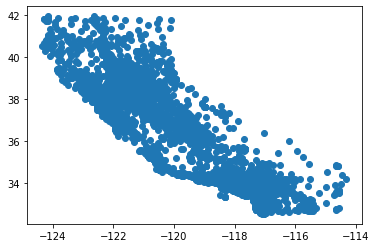

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [6]:
from sklearn.cluster import KMeans

In [8]:
kmeans_scores = []
for size in range(1, 15):
    kmeans_model = KMeans(n_clusters=size, random_state=25)
    kmeans_model.fit(X)
    kmeans_scores.append(kmeans_model)

In [9]:
inertia_scores = [each.inertia_ for each in kmeans_scores]

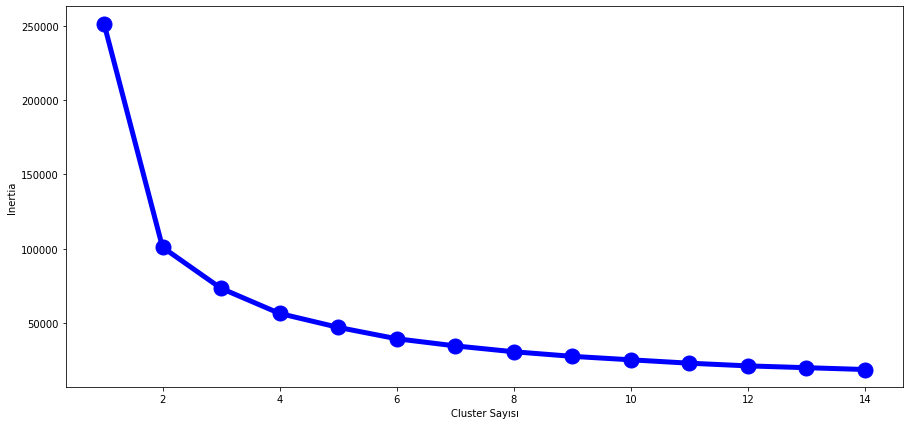

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 15), inertia_scores, 'bo-', linewidth=5, markersize=15)
# plt.axis([2, 8, 0, 1500])
plt.xlabel('Cluster Sayısı')
plt.ylabel('Inertia')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_scores = [silhouette_score(X, each_kmeans_score.labels_) for each_kmeans_score in kmeans_scores[1:]]

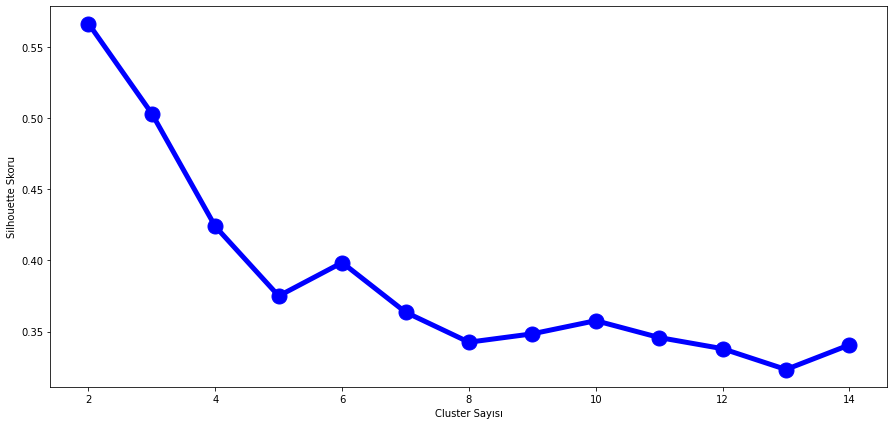

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(range(2, 15), silhouette_scores, 'bo-', linewidth=5, markersize=15)
# plt.axis([2, 8, 0.5, 0.75])
plt.xlabel('Cluster Sayısı')
plt.ylabel('Silhouette Skoru')
plt.show()

In [27]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


In [30]:
silhouette_coefficients = [silhouette_samples(X, each_kmeans_score.labels_) for each_kmeans_score in kmeans_scores[1:]]


In [34]:
import matplotlib as mpl
import numpy as np

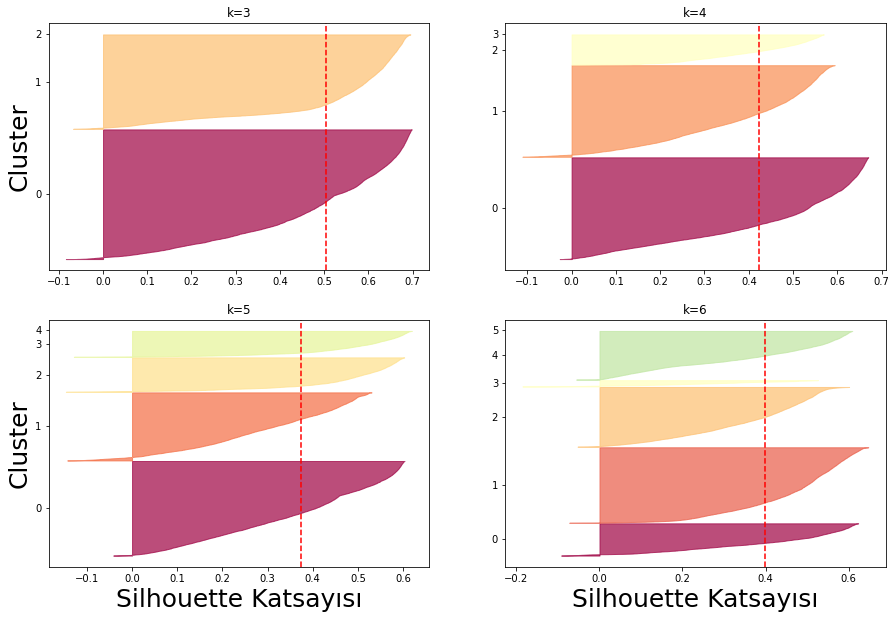

In [39]:
plt.figure(figsize=(15,10))

for k in [3,4,5,6]:
    plt.subplot(2,2,k-2)
    padding = 50
    pos = padding
    ticks = []
    labels = kmeans_scores[k-2].labels_
    for i in range(k):

        coefficients = silhouette_coefficients[k-2][labels == i]
        coefficients.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coefficients)), 0, coefficients,
                          facecolor=color, edgecolor=color, alpha=0.7)
        tick = pos + len(coefficients) // 2
        ticks.append(tick)
        pos += len(coefficients) + padding

    if k in[3,5]:
        plt.ylabel("Cluster", fontsize = 25)


    if k in [5,6]:
        plt.xlabel("Silhouette Katsayısı", fontsize = 25)

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f'k={k}')
    plt.axvline(x = silhouette_scores[k-2], color = 'red', linestyle = '--')

plt.show()

##Matplotlib

In [45]:
import matplotlib.pyplot as plt

In [57]:
X[each_kmeans.labels_==label]

,MedInc,Latitude,Longitude
2823,5.5261,35.42,-119.08
2825,5.6235,35.41,-119.09
2827,4.8571,35.43,-119.09
2829,5.5750,35.39,-119.08
2836,4.3906,35.40,-119.00
...,...,...,...
20497,6.1383,34.30,-118.70
20498,6.1834,34.29,-118.70
20499,6.3199,34.30,-118.71
20500,6.1825,34.30,-118.70


In [42]:
set(kmeans_scores[4].labels_)

{0, 1, 2, 3, 4}

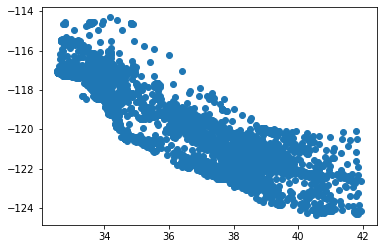

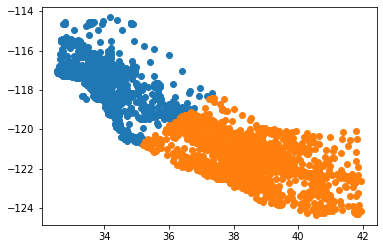

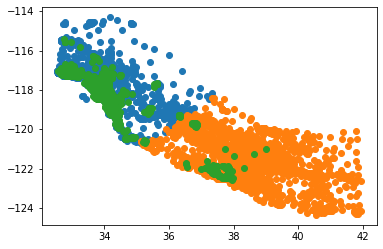

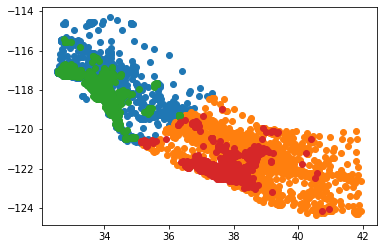

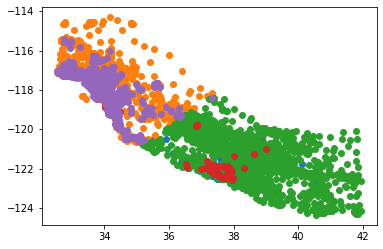

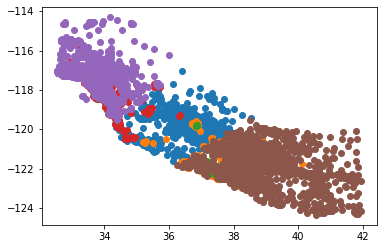

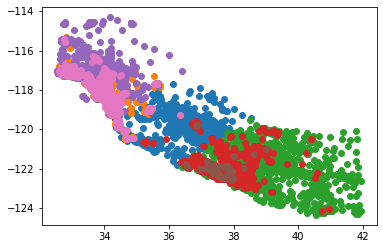

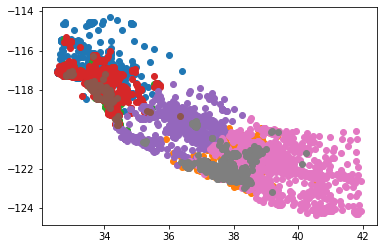

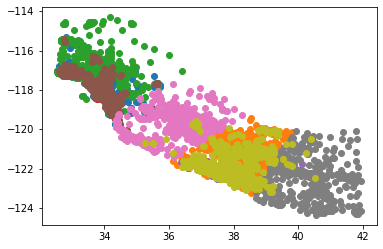

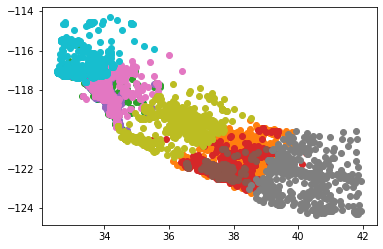

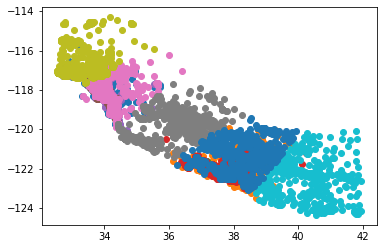

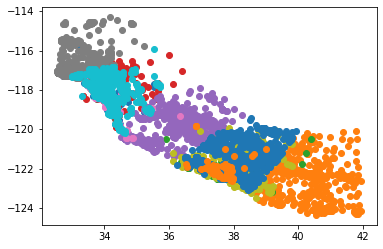

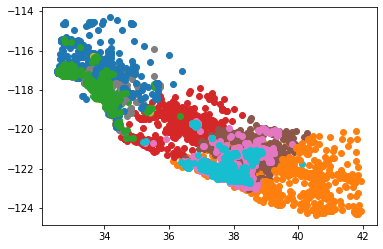

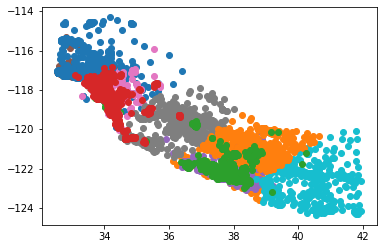

In [58]:
for each_kmeans in kmeans_scores:
    for label in set(each_kmeans.labels_):
        if label == -1:
            plt.scatter(X[each_kmeans.labels_==label,0], X[each_kmeans.labels_==label,1],marker='x')
            continue
        plt.scatter(X[each_kmeans.labels_==label]['Latitude'], X[each_kmeans.labels_==label]['Longitude'])
    plt.show()

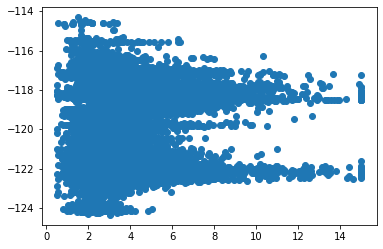

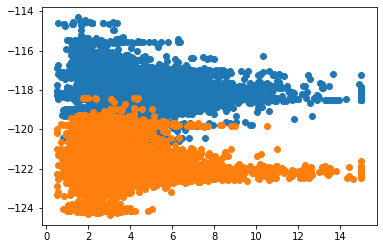

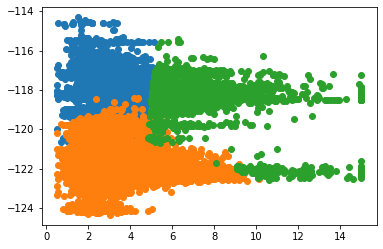

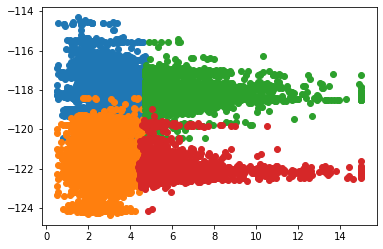

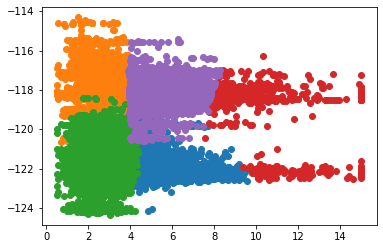

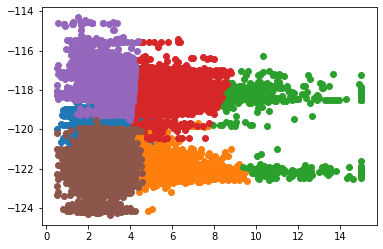

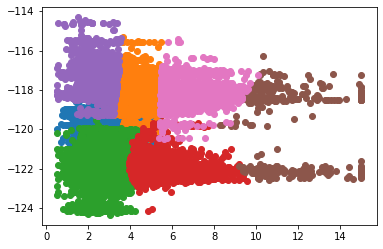

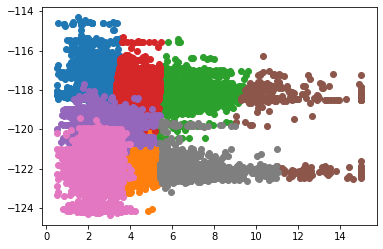

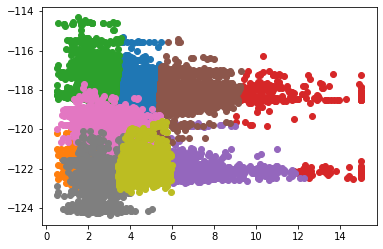

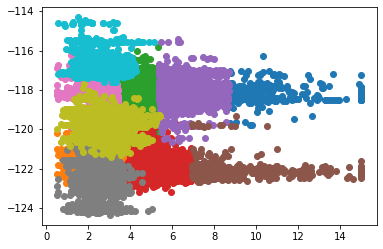

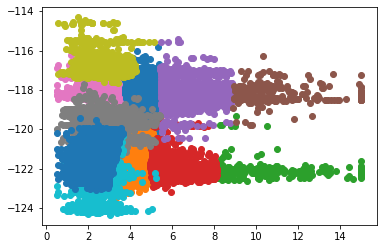

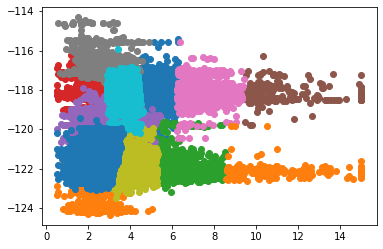

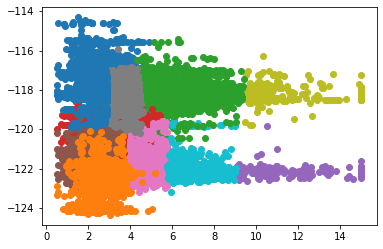

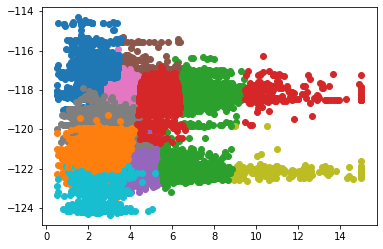

In [59]:
for each_kmeans in kmeans_scores:
    for label in set(each_kmeans.labels_):
        if label == -1:
            plt.scatter(X[each_kmeans.labels_==label,0], X[each_kmeans.labels_==label,1],marker='x')
            continue
        plt.scatter(X[each_kmeans.labels_==label]['MedInc'], X[each_kmeans.labels_==label]['Longitude'])
    plt.show()

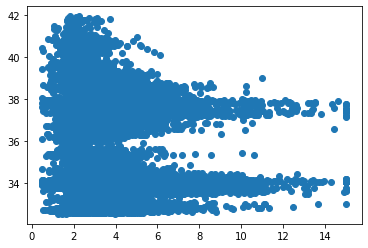

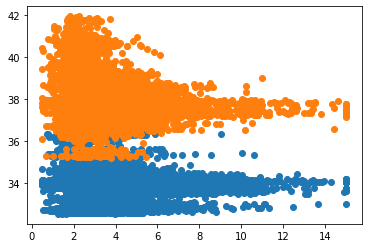

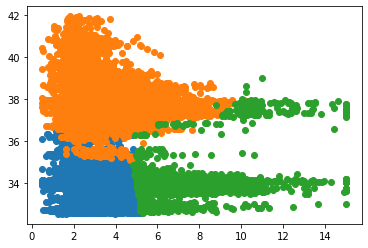

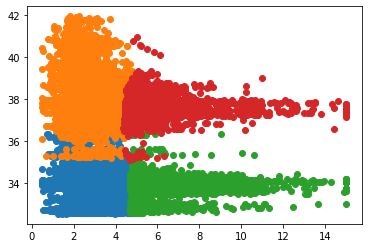

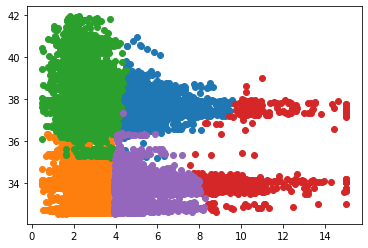

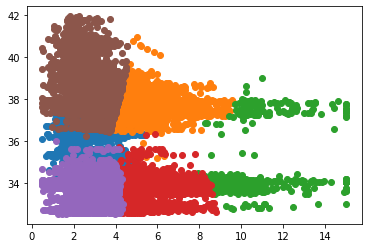

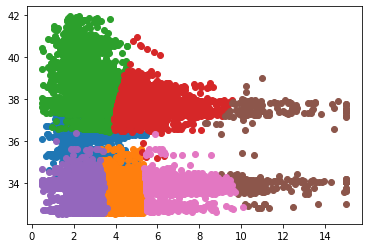

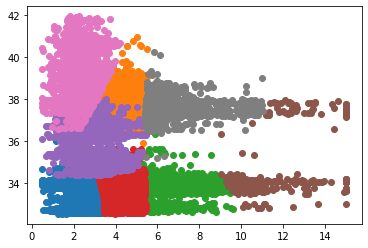

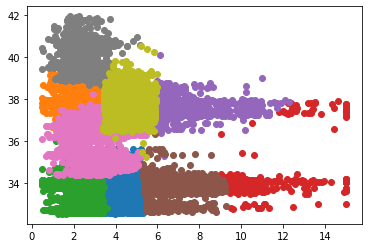

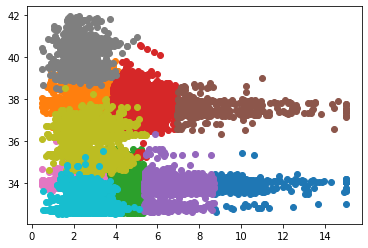

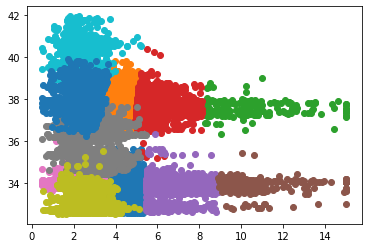

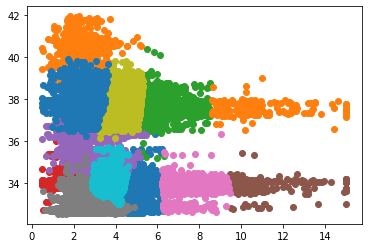

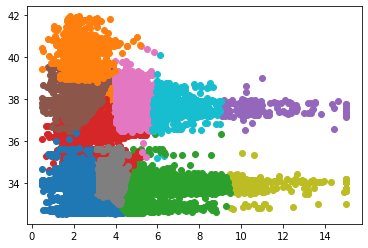

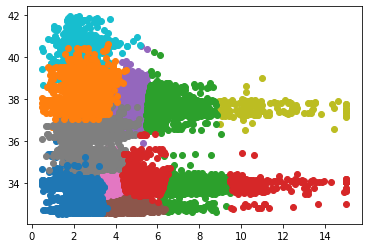

In [60]:
for each_kmeans in kmeans_scores:
    for label in set(each_kmeans.labels_):
        if label == -1:
            plt.scatter(X[each_kmeans.labels_==label,0], X[each_kmeans.labels_==label,1],marker='x')
            continue
        plt.scatter(X[each_kmeans.labels_==label]['MedInc'], X[each_kmeans.labels_==label]['Latitude'])
    plt.show()